In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.set_cmap('inferno')

save_dir = 'liquid-handling'

if not os.path.exists(save_dir):
    os.mkdir(save_dir)

<Figure size 640x480 with 0 Axes>

/tmp/ipykernel_960404/2699147612.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(df.index,


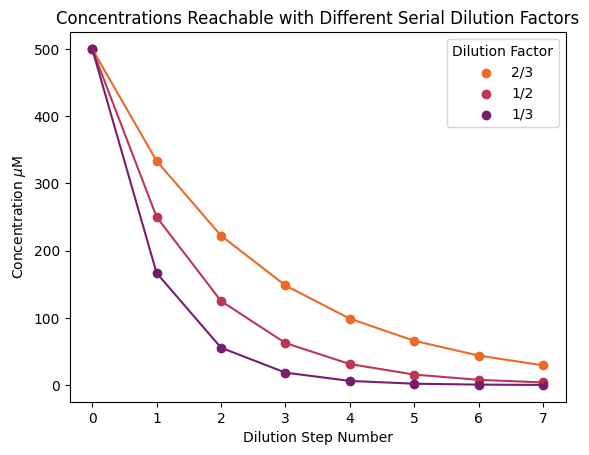

In [2]:
c0 = 500 # microlitres

x = [
    [c0] + [c0*((2/3)**i) for i in range(1, 8)],
    [c0] + [c0*((1/2)**i) for i in range(1, 8)],
    [c0] + [c0*((1/3)**i) for i in range(1, 8)],
]

df = pd.DataFrame(x, index=['2/3', '1/2', '1/3',]).T

colors = plt.cm.inferno([eval(compile(i, '<string>', 'eval')) for i in df.columns])

for i, j in enumerate(df.columns):
    plt.scatter(df.index,
                df[j],
                label=j,
                c=colors[i],
                )
    plt.plot(df.index,
             df[j],
             c=colors[i],
             )
plt.legend(title='Dilution Factor')
plt.title('Concentrations Reachable with Different Serial Dilution Factors')
plt.xlabel('Dilution Step Number')
plt.ylabel('Concentration $\mu$M')
plt.savefig(
    os.path.join(save_dir,
                 'concentrations-reachable-with-different-serial-dilution-factors'
                ) + '.png'
)
plt.show()

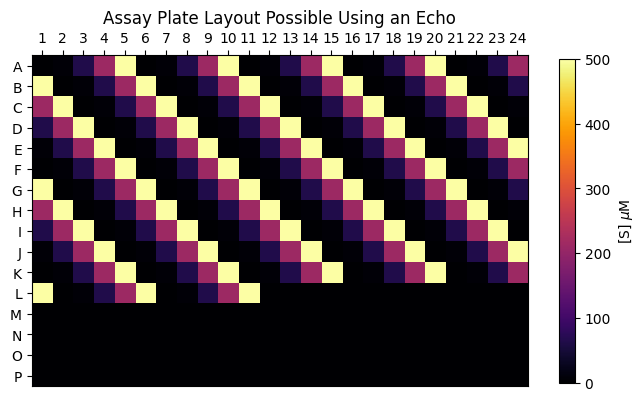

In [3]:
from string import ascii_uppercase

n_concs = 5
n_compounds = 56
k = 3

x = (np.linspace(0, 1, n_concs) ** k) * 500 # single concentration range
x = np.concatenate([x for _ in range(1, n_compounds)]) # repeat n_compounds times
x = np.concatenate([x, np.zeros(384 - len(x))]) # empty wells
x = np.array(x).reshape(16, 24) # plate shape

fig, ax = plt.subplots(1, figsize=(8, 6))

ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)

im = ax.imshow(x)
ax.set_yticks(range(x.shape[0]),
           ascii_uppercase[:x.shape[0]]
          )
ax.set_xticks(range(x.shape[1]),
           range(1, x.shape[1] + 1),
           )
ax.set_title('Assay Plate Layout Possible Using an Echo')
fig.colorbar(im,
             ax=ax,
             label='[S] $\mu$M',
             shrink=0.7,
            )
plt.savefig(os.path.join(save_dir,
                        'assay-plate-layout-echo.png',
                        )
           )
plt.show()